<a href="https://colab.research.google.com/github/ErangaOttachchige/Applied-AI-tutorials/blob/main/Tutorial_Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APPLIED AI: Tutorial week 8 - Neural Networks

Run the following code and answer the questions. Also, do the exercises described at the end.



# TASK 1: CLASSIFICATION TASK



## 1) Download and load the MNIST dataset

In this tutorial we will be working with the MNIST dataset.
This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

You can find more information on the dataset here: https://keras.io/api/datasets/mnist/

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

seed = 123 # to ensure we always get the same results
np.random.seed(seed) # to ensure we always get the same results
tf.keras.utils.set_random_seed(seed) # to ensure we always get the same results

fashion_mnist = tf.keras.datasets.fashion_mnist

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## 2) Split and visualise the first image in the train set

[9 0 0 ... 3 0 5]


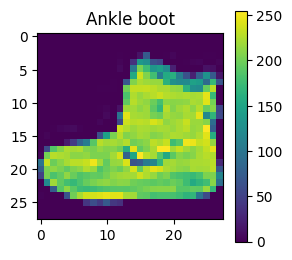

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_labels)
plt.figure(figsize=(3, 3))
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

#### **Question 1: How many images do you have in the train set and the in the test set? What is the size (in pixels) of the images?**
*Hint: You can use the .shape function and the len() function*

In [29]:
# Add code here to answer the question
print("Traning image count", len(train_images))
print("test image count", len(test_images))
print("Shape of an image", test_images[0].shape)

Traning image count 60000
test image count 10000
Shape of an image (28, 28)


#### **Question 2: How many images do you have for each class in the train set? Is it a balanced dataset?**

To answer this question, explore the data in train_labels. Each different label corresponds to a different class. You will have to count how many labels you have in the dataset for each class. The variable class_names has the names for each label in the same order (e.g., label in index 0 in class_names corresponds to label with value 0 in train_labels.

*Hint: The following code counts the number of values i in train_labels: np.count_nonzero(train_labels == i)*

In [6]:
# Add code here to answer the question



## 3) Visualise the first 25 images in the train set

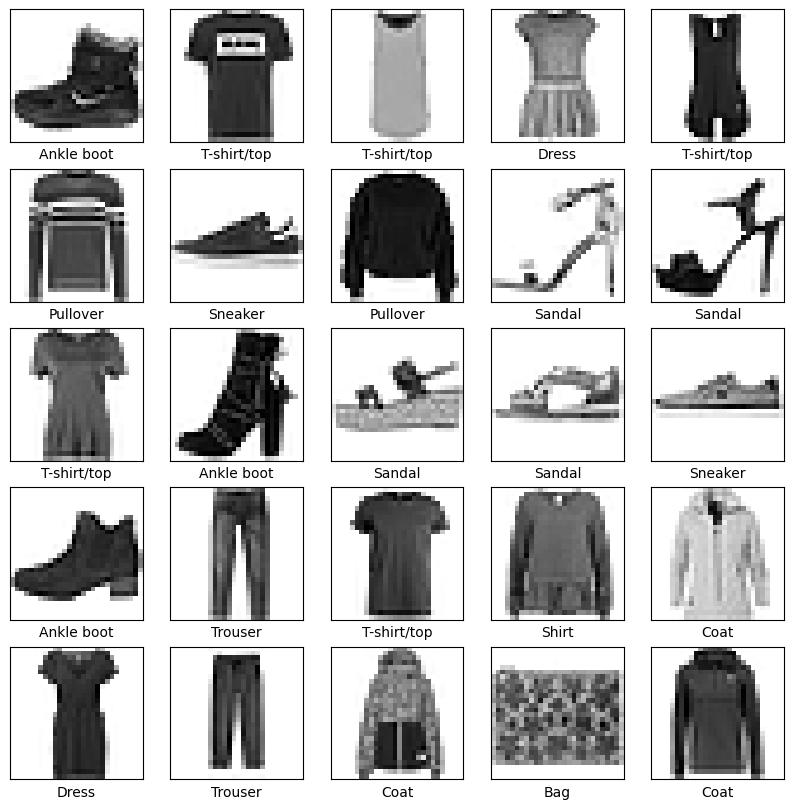

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 4) Create a neural network with Tensorflow

This is a very simple model with only 2 dense layers

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'), # number of units = 128
    tf.keras.layers.Dense(10) # number of outputs = 10 (10 classess)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 5) Compile the model

Here we compile the model. We will use an Adam optimiser, and a sparse categorical cross entropy as a loss function because the labels of the images belong to a class.

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## 6) Train the model

In [10]:
epochs = 10
history = model.fit(train_images, train_labels, validation_data=[test_images, test_labels], epochs=epochs)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6824 - loss: 10.7825 - val_accuracy: 0.7408 - val_loss: 0.9061
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7414 - loss: 0.7451 - val_accuracy: 0.7783 - val_loss: 0.6779
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7842 - loss: 0.6129 - val_accuracy: 0.8033 - val_loss: 0.5908
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8073 - loss: 0.5532 - val_accuracy: 0.8077 - val_loss: 0.6060
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8095 - loss: 0.5450 - val_accuracy: 0.8167 - val_loss: 0.5379
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8239 - loss: 0.5235 - val_accuracy: 0.8157 - val_loss: 0.6230
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8317 - loss: 0.5120 - val_accuracy: 0.8283 - val_loss: 0.5644
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8348 - loss: 0.5072 

## 7) Evaluate the model

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8020 - loss: 0.6437

Test accuracy: 0.8019999861717224


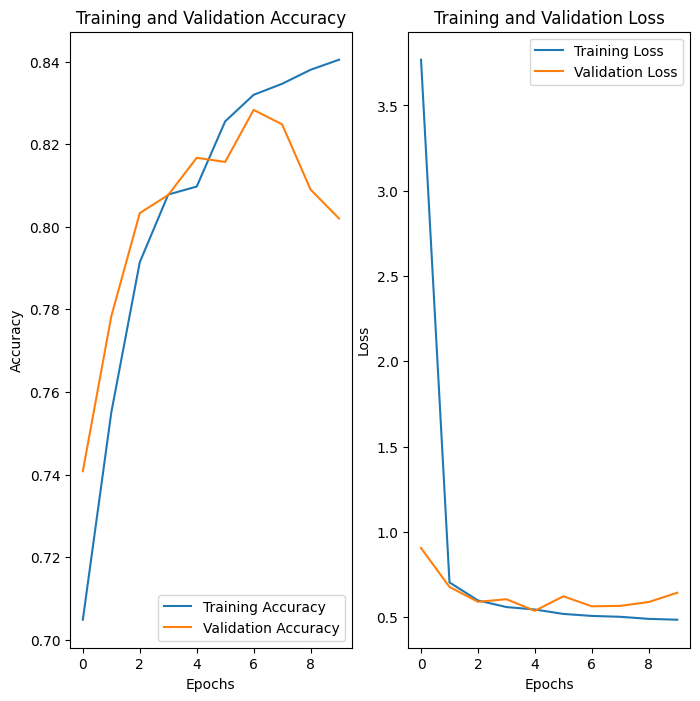

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#### **Question 3: Is the validation accuracy higher or lower than the training accuracy at epoch 10? Why?**

Answer:

#### **Question 4: Looking at the plot, do you think the accuracy could be improved? What would happen if we increase the number of epochs?**

Answer:

## 8) Get probabilities.

For each test image will tell us the probability to belong to each of the 10 classes (i.e., for each test image will output an array of 10 values).

Since our model returns the logits, we add a Softmax layer in order to convert logits to probabilities.

In [13]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
probabilities = probability_model.predict(test_images)
print('Size of variable probabilities: ' + str(probabilities.shape)) # You can see the size of the arrays here (10000, 10)
print('Probabilities:')
print(probabilities) # Returns an array of 10000 arrays with 10 probabilities each (one for each class)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Size of variable probabilities: (10000, 10)
Probabilities:
[[4.3635241e-14 1.8726557e-14 0.0000000e+00 ... 3.8204525e-02
  8.6017634e-12 9.4414955e-01]
 [1.7865863e-02 1.3663055e-06 5.7477474e-01 ... 6.2412757e-27
  3.7263040e-04 1.0713828e-21]
 [1.5032983e-07 9.9999982e-01 4.0018469e-09 ... 0.0000000e+00
  3.6968007e-16 0.0000000e+00]
 ...
 [1.3601935e-03 5.5189168e-18 3.6147984e-11 ... 0.0000000e+00
  9.9766034e-01 3.0638474e-36]
 [8.4436206e-06 9.9999136e-01 1.8089352e-07 ... 0.0000000e+00
  6.0711462e-12 0.0000000e+00]
 [1.5211743e-08 3.9510577e-22 1.1700160e-13 ... 4.5638154e-03
  3.2470576e-04 4.0211721e-04]]


## 9) Get predicted class
For each image, we have a vector of 10 probabilities (1 for each possible class) that tells us the probability that that image belongs to the class. We now want to get the class with the highest probability. We use argmax to get the class with the highest probability

In [14]:
predictions = np.argmax(probabilities, axis = 1) # gets the maximum probability of each image (maximum value)

print('Size of variable predictions: ' + str(predictions.shape)) # We now have one value (class) for each image.
print('Predictions:')
print(predictions)
print('Labels:')
print(test_labels)

Size of variable predictions: (10000,)
Predictions:
[9 2 1 ... 8 1 5]
Labels:
[9 2 1 ... 8 1 5]


## 10) Final accuracy (test set)

In [15]:
accuracy_test = np.count_nonzero(predictions==test_labels)/len(test_images)
print('The accuracy on the test set is: ' + str(accuracy_test))

The accuracy on the test set is: 0.802


## 11) Results
Predicted class of first image:

In [16]:
class_names[predictions[0]]

'Ankle boot'

We willl use the following function to plot the results

In [17]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

We will now use the functions to visualise the first 5 images and the predictedclass:

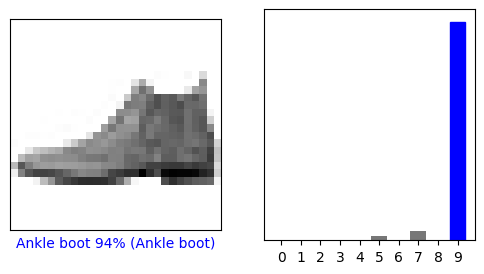

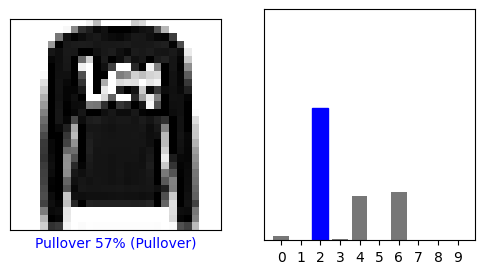

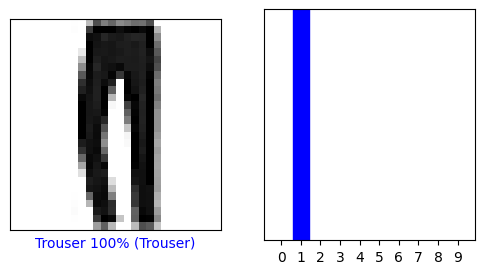

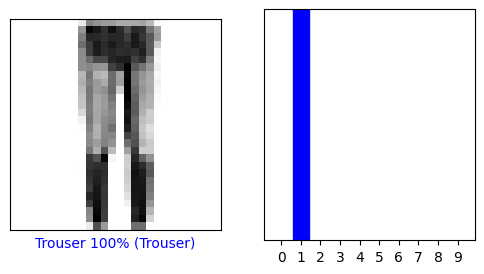

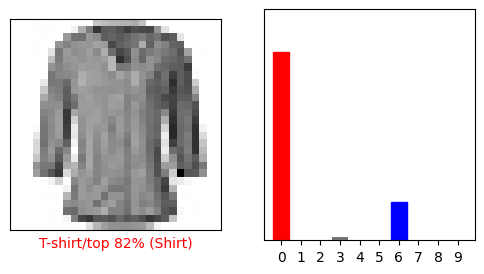

In [18]:
for i in range(5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, probabilities[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, probabilities[i],  test_labels)
    plt.show()

#### **Question 5: Did the model predict the 5 classes correctly? Which is the one with a lower predicted accuracy? why?**

Answer:

## **Tasks**

Next you will perform a manual search of the hyperparameters to fine-tune the network to find the best accuracy possible on the test set.
Discuss in class which parameters and values seem to give a better accuracy.

1.- Change the number of epochs and evaluate the results by looking at the plots generated, e.g.: 50, 100.

2.- Change the learning rate and evaluate the results by looking at the plots generated, e.g.: 0.01, 0.0001.

3.- Change the number of units in the dense layer (not the number of outputs), and evaluate the results by looking at the plots generatede.g.: 256.

4.- Add a new Dense Layer in the model and observe the changes. Think carefully the number of units that the Dense layer will have.


#### **Which hyperparameters provided the best accuracy?**

Compare your results with other students and discuss which parameters had a bigger impact.

# TASK 2: REGRESSION TASK

In this task, we will create a neural network able to predict the temperature (weather) based on the temperature of the last 5 days.



## 1) Create a synthetic dataset

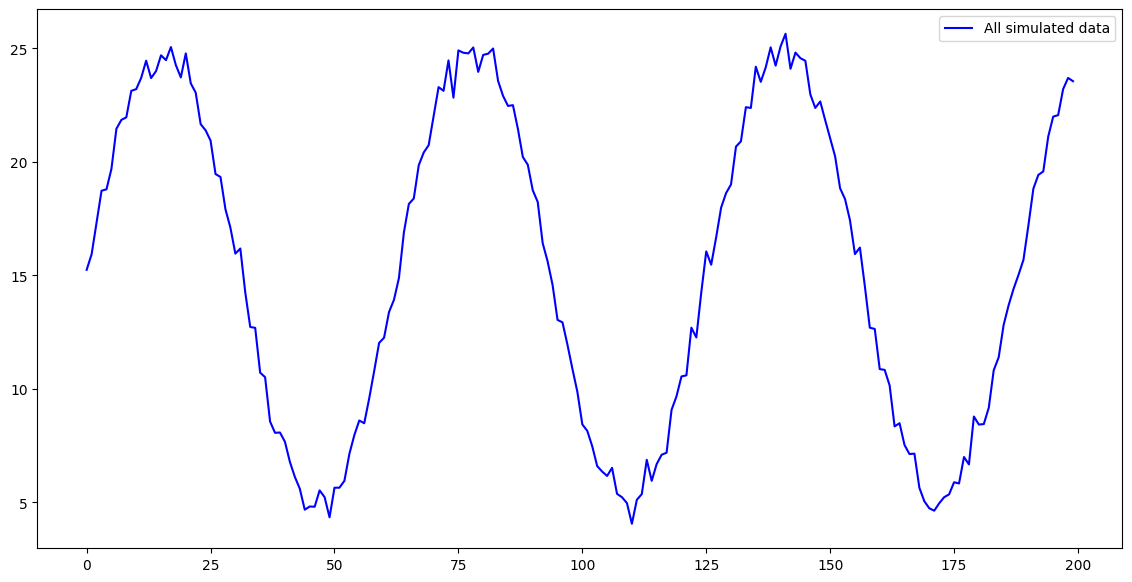

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generating some sample temperature data (for demonstration purposes)
# Let's assume we have 200 days of temperature readings
np.random.seed(42) # to make sure we get the same results
data = ((np.sin(np.linspace(0, 20, 200)) + np.random.normal(scale=0.05, size=200)) * 10) + 15 # Simple sine wave + noise

# Plotting the data generated
plt.figure(figsize=(14, 7))
plt.plot(data, label='All simulated data', color='blue')
plt.legend()

## 2) Create the train and tests sets

In [20]:
# Preparing the dataset
window_size = 5  # Look-back window of 5 days
X = []
y = []

for i in range(len(data) - window_size):
    X.append(data[i:i + window_size])  # Last 5 days
    y.append(data[i + window_size])    # Target: temperature on the next day

X = np.array(X)
y = np.array(y)

# Splitting the data into training and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## 3) Visualise a sample of the dataset

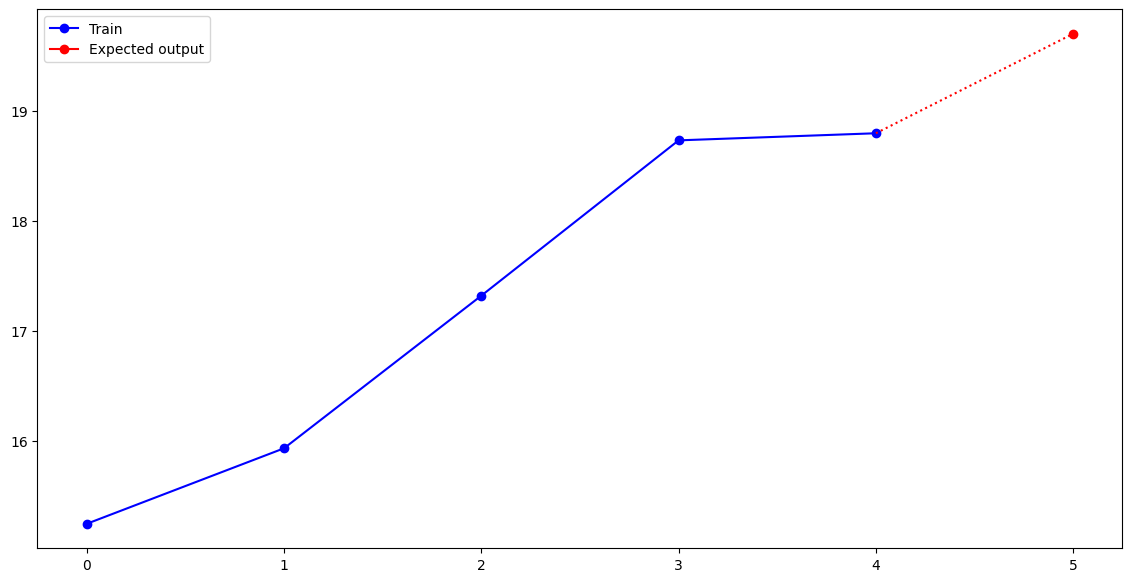

In [21]:
# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(X_train[0], label='Train', color='blue', marker='o') # train data
plt.plot(5,y_train[0], label='Expected output', color='red', marker='o') # output
plt.plot([4, 5], [X[0][-1], y[0]], linestyle='dotted', color='red') # dotted line, for visualisation purposes only
plt.legend()

The blue line represents a sample of the temperature from the previous 5 days used during training. The red dot is the real value representing the temperature of the 6th day (the value to be predicted).

## 4) Create a neural network to make the prediction (regression)



In [22]:
# Building the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(window_size,)),  # 64 neurons in hidden layer
    Dense(1)  # Single output for the predicted temperature
])

# Compiling the model
model.compile(optimizer='adam', loss='mse')  # Mean squared error for regression

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.1, verbose=1)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 110.8128 - val_loss: 5.2866
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9337 - val_loss: 8.6372
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3998 - val_loss: 7.0834
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1136 - val_loss: 6.9148
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9033 - val_loss: 6.6544
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6920 - val_loss: 6.3803
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4809 - val_loss: 6.1127
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2635 - val_loss: 5.8442
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0401 - val_loss: 5.5758
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8125 - val_loss: 5.3101
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5821 - val_loss: 5.0481
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3496 - val_

## 5) Find the accuracy of the model

First, we need to get the predictions from the model using the test set:


In [23]:
# Predict using the test set
predicted_temp = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Let's visualise how good are the predictions (visually):

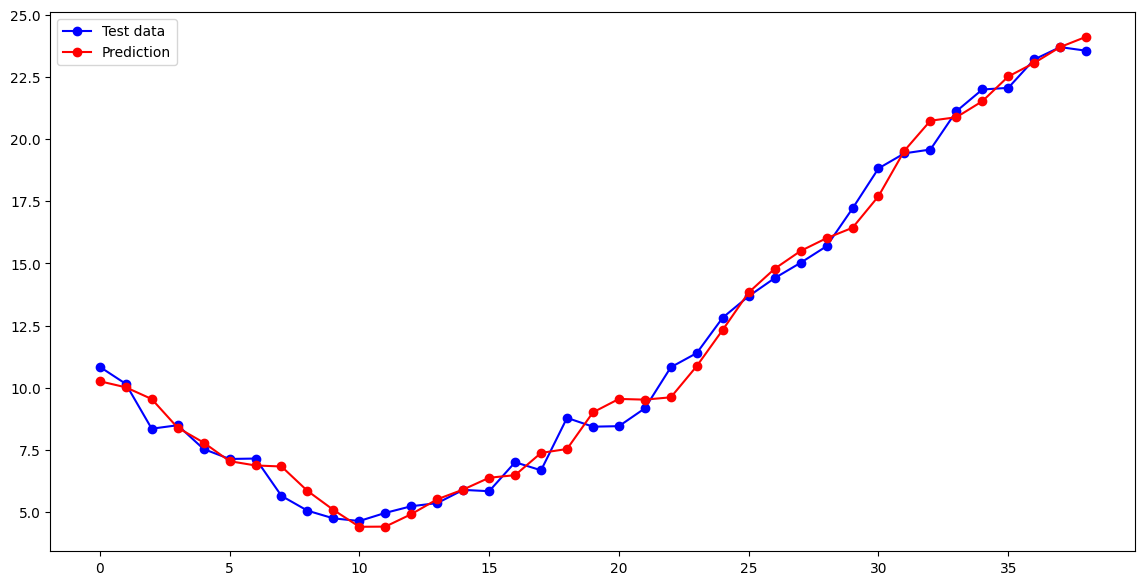

In [24]:
# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Test data', color='blue', marker='o')
plt.plot(predicted_temp, label='Prediction', color='red', marker='o')
plt.legend()

#### **Question 6: Calculate the Mean Squared Error (MSE) of the model**

*Hint: You can use the function mean_squared_error from sklearn.metrics*

In [25]:
from sklearn.metrics import mean_squared_error

# ADD YOUR CODE HERE

## 6) User interaction

Extend the code such that you now ask the user to input the temperature of the last 5 days, and use the model to tell the user the temperature of the following day

In [26]:
# ADD YOUR CODE HERE

# **OPTIONAL - Challenge**

Choose a new dataset  from TensorFlow (https://www.tensorflow.org/datasets/catalog/overview) and train a network to find the best hyperparameters (epochs, learning rate, number of units).